# Importação das Bibliotecas

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import requests
import ftfy

# Importação do Dataset

In [166]:
# URL do arquivo CSV
url = "https://github.com/Ada-Empregabilidade/adahack-2024-dados/raw/main/base_dados/base_de_dados.csv"

In [167]:
# Fazer o download do arquivo CSV
response = requests.get(url)
response.raise_for_status()

# Corrigir a codificação usando ftfy
fixed_content = ftfy.fix_text(response.content.decode('utf-8'))

# Caminho e nome do arquivo
file = "Dados\\base_de_dados.csv"

# Salvar o conteúdo em um arquivo local como UTF-8
with open(file, 'w', encoding='ISO-8859-1') as f:
    f.write(fixed_content)

In [168]:
df = pd.read_csv(file, encoding='ISO-8859-1')

# Aplicação de Algumas Correções de Visuais

In [169]:
# Remover a segunda coluna 'id'
df.drop(df.columns[1], axis=1, inplace=True)

In [170]:
# Renomear as colunas
df = df.rename(columns={'id': 'ID', 'Genero': 'Gênero', 'Tempo de casa': 'Tempo de Casa'})

In [171]:
# Reorganizar a ordem das colunas
nova_ordem = ['ID', 'Nome', 'Gênero', 'Idade', 'Raça', 'Formação', 'Endereço', 'Estado', 'Tempo de Casa', 'Departamento', 'Senioridade']
df = df[nova_ordem]

In [172]:
# Renomear os itens na coluna 'Gênero'
df['Gênero'] = df['Gênero'].replace({'Fem': 'Feminino', 'Masc': 'Masculino'})

In [173]:
# Deixar as palavras na coluna 'Raça' com a primeira letra maiúscula
df['Raça'] = df['Raça'].str.capitalize()

In [174]:
# Deixar cada palavra na coluna 'Formação' com a primeira letra maiúscula
df['Formação'] = df['Formação'].str.title()

In [175]:
# Deixar cada palavra na coluna 'Formação' com a primeira letra maiúscula
df['Senioridade'] = df['Senioridade'].str.title()

In [176]:
# Substituir '\r\n' por ';' na coluna 'Endereço'
df['Endereço'] = df['Endereço'].replace({'\r\n': '; '}, regex=True)

# Substituir "," por ";" na coluna 'Endereço'
df['Endereço'] = df['Endereço'].str.replace(',', ';')

In [177]:
# Converter a coluna 'Idade' para o tipo int
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce').fillna(0).astype(int)

In [178]:
# Converter a coluna 'Tempo de Casa' para o tipo int
df['Tempo de Casa'] = pd.to_numeric(df['Tempo de Casa'], errors='coerce').fillna(0).astype(int)

In [179]:
# # Remover as linhas que contêm valores iguais a zero na coluna 'Idade'
# df = df[df['Idade'] != 0]

In [180]:
# Caminho e nome do arquivo original
file = "Dados\\base_de_dados.csv"

# Salvar o DataFrame e sobrepor o arquivo CSV
df.to_csv(file,  index=False, encoding='ISO-8859-1')

# Algumas Visualizações das Distribuições dos Dados 

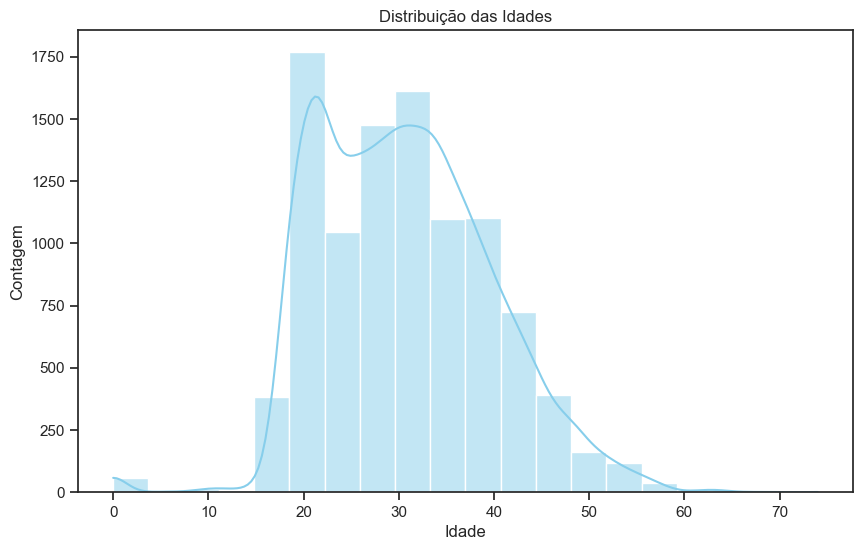

In [181]:
# Configurar o estilo do Seaborn para remover as linhas de grade verticais
sns.set(style="whitegrid", rc={"axes.grid.axis": "y"})
# Configurar o estilo do Seaborn para remover as linhas de grade horizontais
sns.set(style="ticks", rc={"axes.grid.axis": "x"})

# Plotar o gráfico de distribuição das idades
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Idade', bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

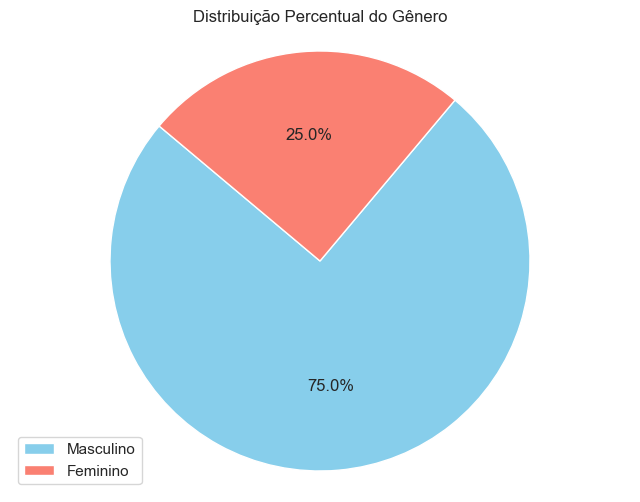

In [182]:
# Contagem de cada gênero
contagem_genero = df['Gênero'].value_counts()

# Configurar cores para o gráfico
cores = ['skyblue', 'salmon']

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_genero, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual do Gênero')

# Adicionar legenda na parte inferior esquerda
plt.legend(labels=contagem_genero.index, loc='lower left')

plt.axis('equal')  # Equaliza os aspectos x e y
plt.show()

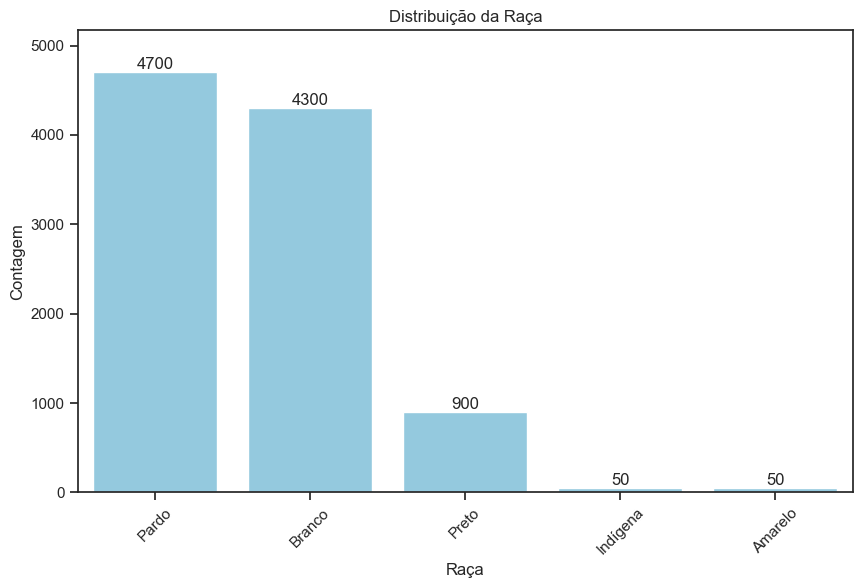

In [183]:
# Contagem de cada raça
contagem_raca = df['Raça'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, hue=contagem_raca.index, palette=[cor]*len(contagem_raca), legend=False)
plt.title('Distribuição da Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_raca.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_raca.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

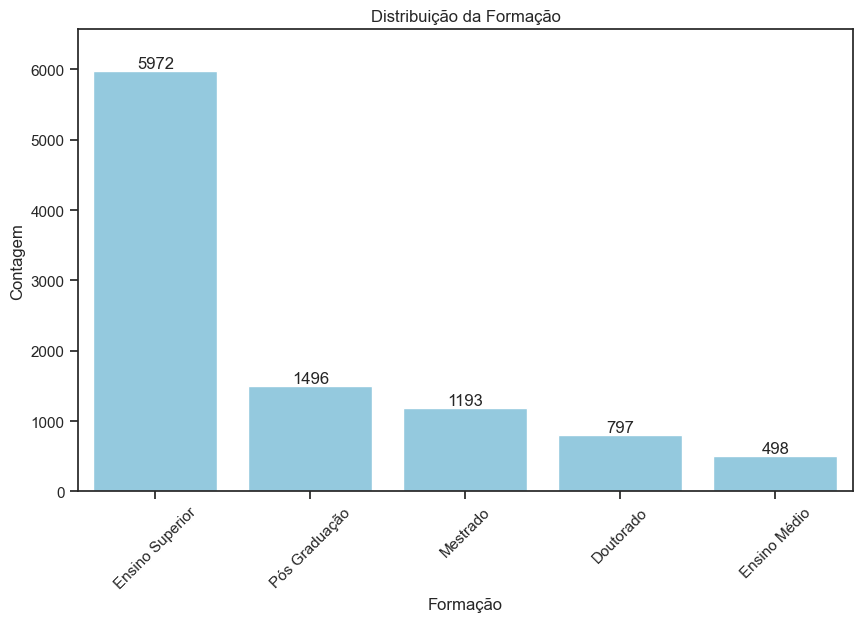

In [184]:
# Contagem de cada formação
contagem_formacao = df['Formação'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(10, 6))
grafico = sns.barplot(x=contagem_formacao.index, y=contagem_formacao.values, hue=contagem_formacao.index, palette=[cor]*len(contagem_formacao), legend=False)
plt.title('Distribuição da Formação')
plt.xlabel('Formação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_formacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_formacao.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

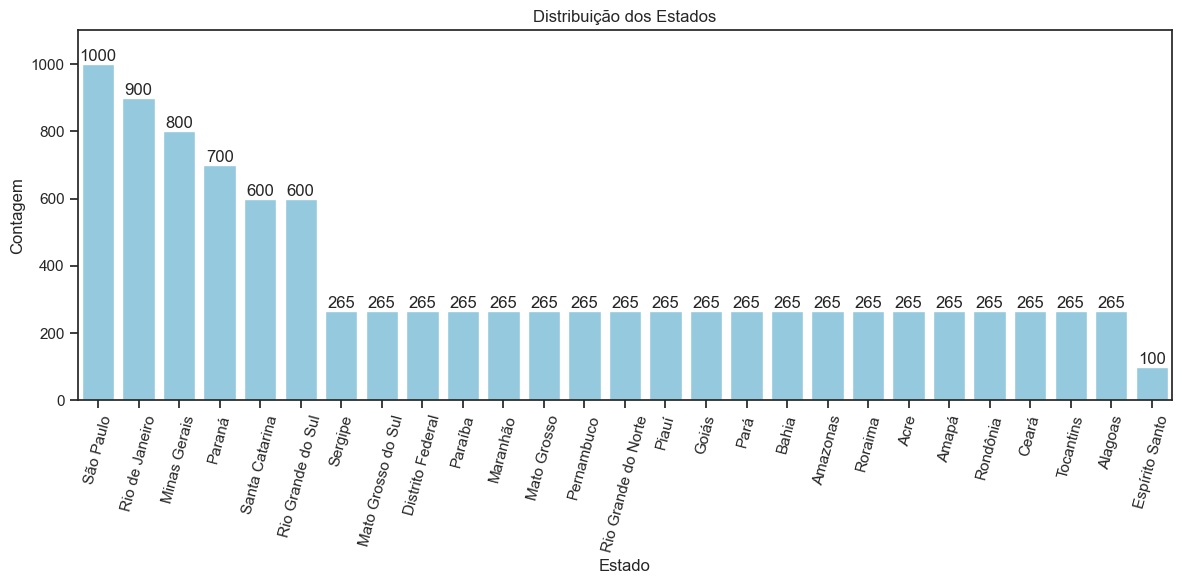

In [185]:
# Contagem de cada estado
contagem_estado = df['Estado'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_estado.index, y=contagem_estado.values, hue=contagem_estado.index, palette=[cor]*len(contagem_estado), legend=False)
plt.title('Distribuição dos Estados')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.xticks(rotation=75, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_estado.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_estado.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

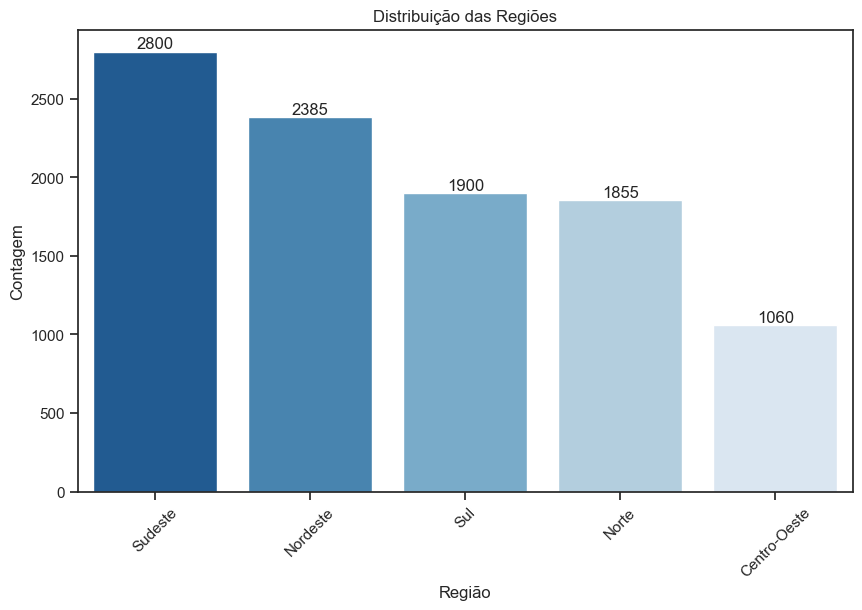

In [186]:
# Mapeamento dos estados para as regiões do Brasil
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Mapeamento inverso de regiões para estados
estados_por_regiao = {estado: regiao for regiao, estados in regioes.items() for estado in estados}

# Agrupar os estados por regiões
df['Região'] = df['Estado'].map(estados_por_regiao)

# Contagem de cada região
contagem_regiao = df['Região'].value_counts()

# Definindo uma paleta de cores que varia de tons de azul
paleta_cores = sns.color_palette("Blues_r", len(contagem_regiao))

# Plotar o gráfico de barras verticais para a distribuição das regiões
plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_regiao.index, y=contagem_regiao.values, palette=paleta_cores, hue=contagem_regiao.index, legend=False)
plt.title('Distribuição das Regiões')
plt.xlabel('Região')
plt.ylabel('Contagem')

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_regiao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

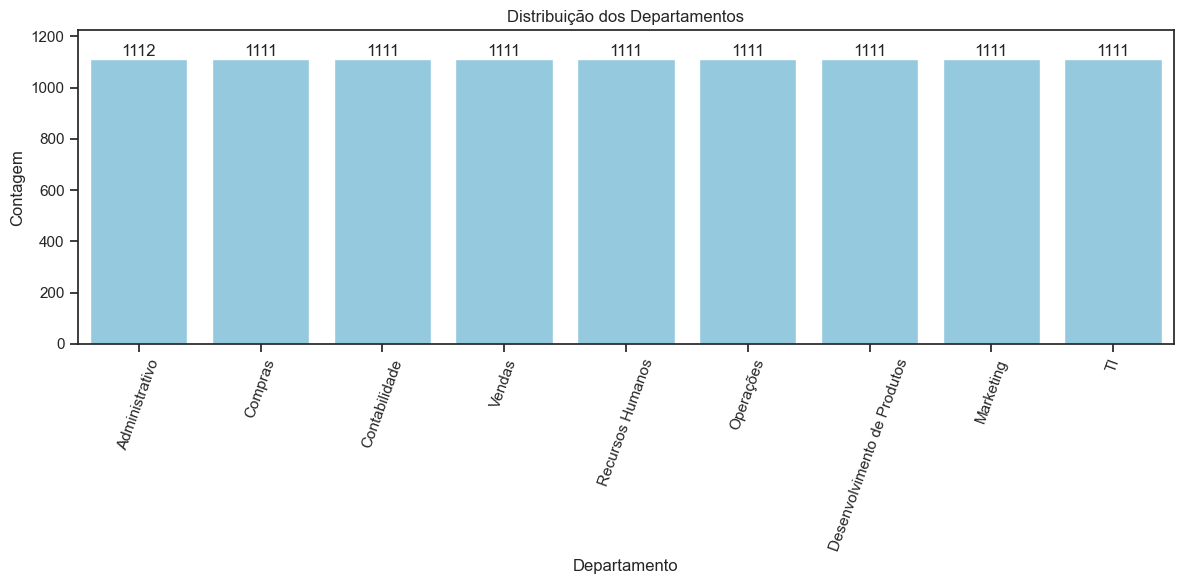

In [187]:
# Contagem de cada departamento
contagem_departamento = df['Departamento'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_departamento.index, y=contagem_departamento.values, hue=contagem_departamento.index, palette=[cor]*len(contagem_departamento), legend=False)
plt.title('Distribuição dos Departamentos')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.xticks(rotation=70, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_departamento.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_departamento.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

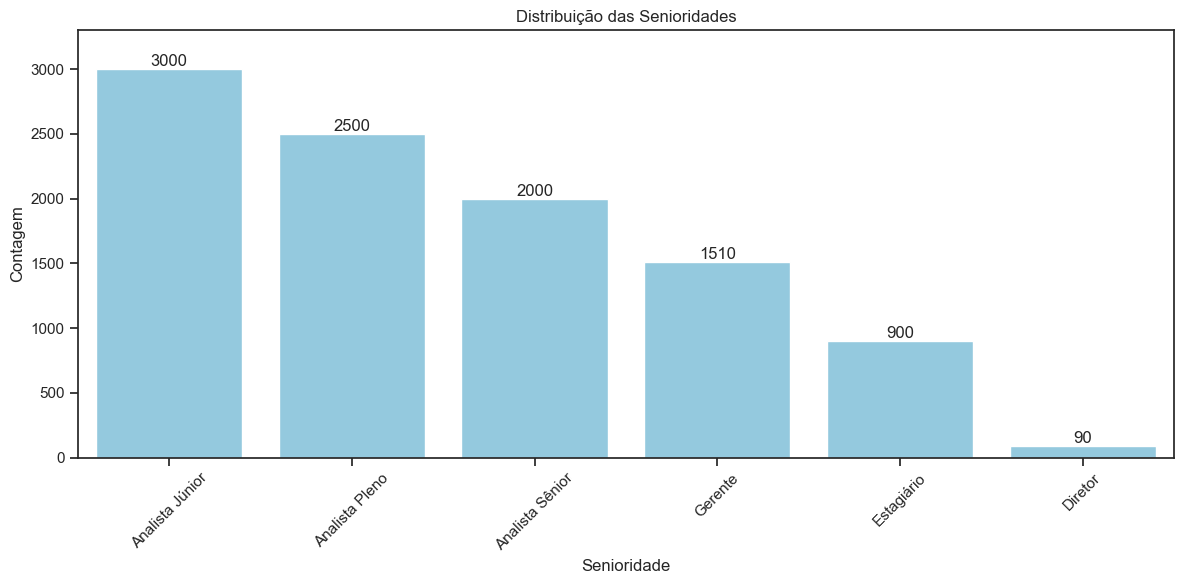

In [189]:
# Contagem de cada senioridade
contagem_senioridade = df['Senioridade'].value_counts()

# Configurar cor para o gráfico
cor = 'skyblue'

# Plotar o gráfico de barras verticais
plt.figure(figsize=(12, 6))
grafico = sns.barplot(x=contagem_senioridade.index, y=contagem_senioridade.values, hue=contagem_senioridade.index, palette=[cor]*len(contagem_senioridade), legend=False)
plt.title('Distribuição das Senioridades')
plt.xlabel('Senioridade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='center')  # Rotaciona os rótulos do eixo x verticalmente
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionar os valores numéricos acima das barras
for index, value in enumerate(contagem_senioridade.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylim(0, contagem_senioridade.max() * 1.1)  # Ajustar os limites do eixo y

plt.show()

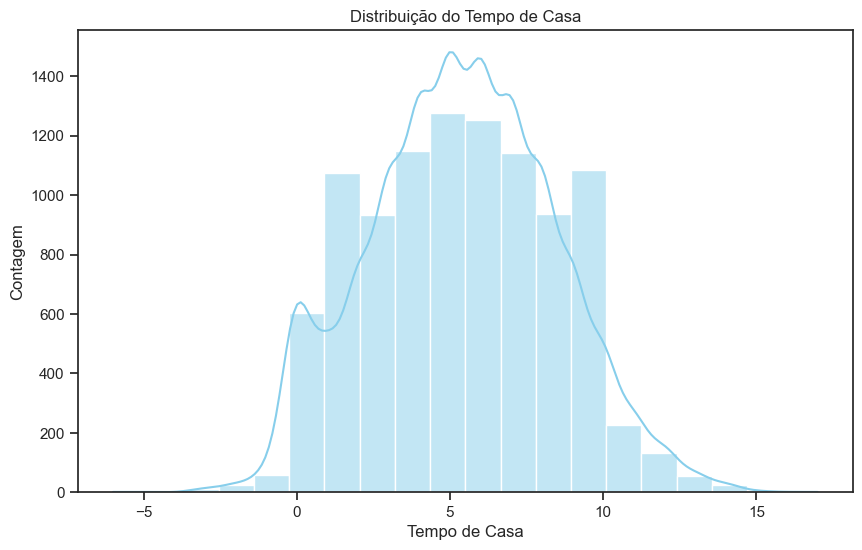

In [190]:
# Configurar o estilo do Seaborn para remover as linhas de grade verticais
sns.set(style="whitegrid", rc={"axes.grid.axis": "y"})
# Configurar o estilo do Seaborn para remover as linhas de grade horizontais
sns.set(style="ticks", rc={"axes.grid.axis": "x"})

# Plotar o gráfico de distribuição do tempo de casa
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tempo de Casa', bins=20, kde=True, color='skyblue')
plt.title('Distribuição do Tempo de Casa')
plt.xlabel('Tempo de Casa')
plt.ylabel('Contagem')
plt.show()